In [1]:
import fxcmpy
import pandas as pd
import plotly.express as px
import datetime
import numpy as np
import backtrader as bt

In [2]:
con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo') # server = 'real' for live

In [3]:
instruments = con.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'USEquities']


## Getting historical data

In [4]:
start_dt = datetime.datetime(2018, 1, 1)
stop_dt = datetime.datetime(2018, 12, 31)

data_hist = con.get_candles('EUR/GBP', period='D1', start = start_dt, stop = stop_dt)  # daily data
data_hist

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-01-02 22:00:00,0.88910,0.88703,0.89173,0.88580,0.88935,0.88742,0.89193,0.88599,137937
2018-01-03 22:00:00,0.88703,0.88867,0.88991,0.88471,0.88742,0.88923,0.89012,0.88492,147134
2018-01-04 22:00:00,0.88867,0.89030,0.89234,0.88798,0.88923,0.89087,0.89255,0.88814,140781
2018-01-05 22:00:00,0.89030,0.88619,0.89102,0.88619,0.89087,0.88764,0.89140,0.88677,145484
2018-01-07 22:00:00,0.88619,0.88652,0.88737,0.88613,0.88764,0.88756,0.88850,0.88675,343
...,...,...,...,...,...,...,...,...,...
2018-12-26 22:00:00,0.89861,0.89844,0.90070,0.89654,0.89967,0.89880,0.90095,0.89682,125567
2018-12-27 22:00:00,0.89844,0.90344,0.90601,0.89734,0.89880,0.90434,0.90628,0.89797,358785
2018-12-28 22:00:00,0.90344,0.90061,0.90588,0.90028,0.90434,0.90135,0.90610,0.90051,237190


In [5]:
data_hist['pandas_SMA_3'] = data_hist["askclose"].rolling(window=3).mean()
data_hist['pandas_SMA_50'] = data_hist["askclose"].rolling(window=50).mean()

data_hist.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,pandas_SMA_3,pandas_SMA_50
date,,,,,,,,,,,
2018-01-02 22:00:00,0.88910,0.88703,0.89173,0.88580,0.88935,0.88742,0.89193,0.88599,137937,NaN,NaN
2018-01-03 22:00:00,0.88703,0.88867,0.88991,0.88471,0.88742,0.88923,0.89012,0.88492,147134,NaN,NaN
2018-01-04 22:00:00,0.88867,0.89030,0.89234,0.88798,0.88923,0.89087,0.89255,0.88814,140781,0.889173,NaN
2018-01-05 22:00:00,0.89030,0.88619,0.89102,0.88619,0.89087,0.88764,0.89140,0.88677,145484,0.889247,NaN
2018-01-07 22:00:00,0.88619,0.88652,0.88737,0.88613,0.88764,0.88756,0.88850,0.88675,343,0.888690,NaN


<function matplotlib.pyplot.show(*args, **kw)>

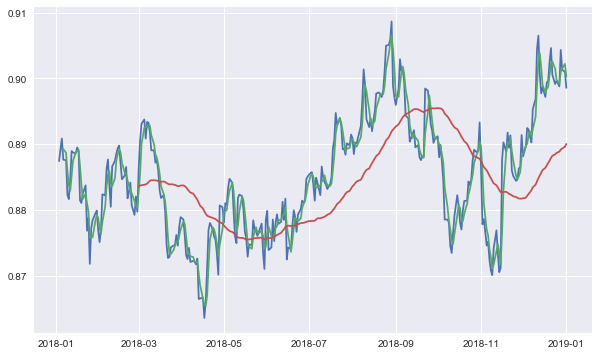

In [6]:
from pylab import plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use('seaborn')
plt.figure(figsize = (10,6))
plt.plot(data_hist['askclose'])
plt.plot(data_hist['pandas_SMA_3'])
plt.plot(data_hist['pandas_SMA_50'])
plt.show

## Subscribe to live data

In [7]:
#con.subscribe_market_data('EUR/CHF')

In [8]:
con.get_subscribed_symbols()

[]

In [9]:
con.is_subscribed('EUR/CHF')

False

In [10]:
#con.get_last_price('EUR/CHF')

In [11]:
print("ur mom gay")

ur mom gay


In [12]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Create a Data Feed
    dataframe = con.get_prices('EUR/USD')
    data = bt.feeds.PandasData(dataname = dataframe)
    
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: {}'.format(cerebro.broker.getvalue()))

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: {}'.format(cerebro.broker.getvalue()))
    print(data)

Starting Portfolio Value: 100000.0
Final Portfolio Value: 100000.0


In [13]:
con.unsubscribe_market_data('EUR/CHF')
print("unsubscribed")

unsubscribed


In [14]:
if con.is_connected():
    con.close()
    print("connection closed")

connection closed
